In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import functions as f

## Hypotheses

*  Social Media opinions can positively or negatively impact the price of cryptocurrencies based on the sentiment.
*  Low Unemployment rates can lead to increase in Cryptocurrency prices, and vice versa
*  The Federal Interest rates have a strong influence over Cryptocurrency prices
*  Rise in inflation can cause the prices of Cryptocurrencies to decrease
*  Cryptocurrency has similar trends to that of the US Dollar    


## Twitter Sentiment

In [130]:
bitcoin = f.crypto_dataset('./cryptodata/bitcoin_2013-01-01_2024-04-22.csv')

In [131]:
tweets = pd.read_csv("btc_selected_with_sentiment_2023_01_02_2023_06_12.csv")

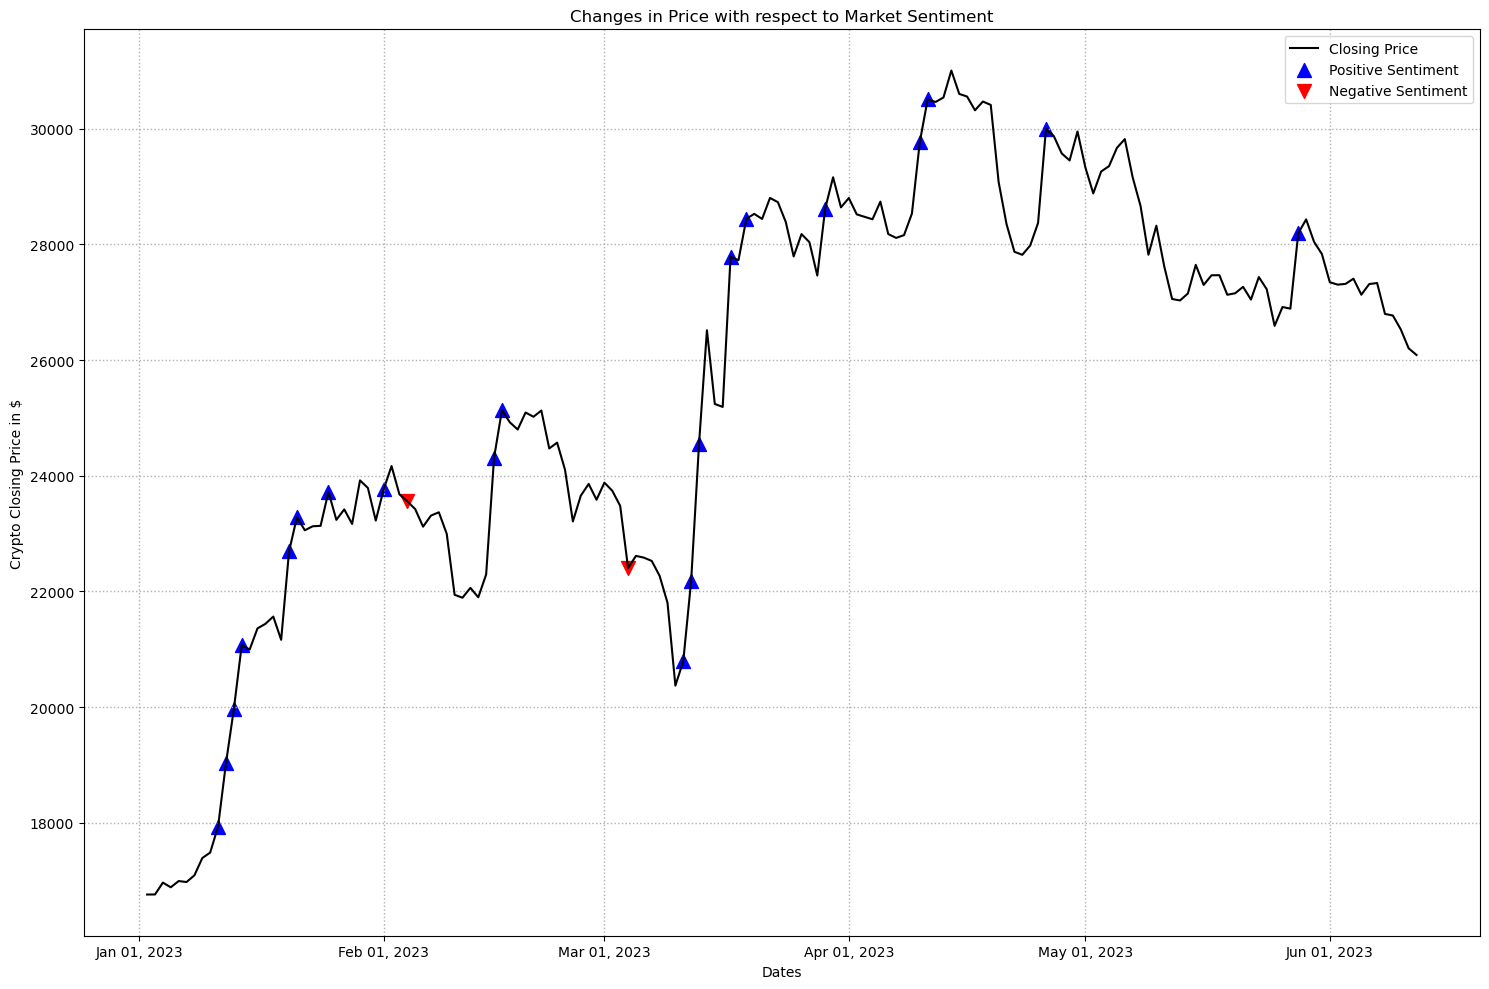

In [132]:
btc_tweets = f.crypto_sentiment("./TwitterData/btc_selected_with_sentiment_2023_01_02_2023_06_12.csv")

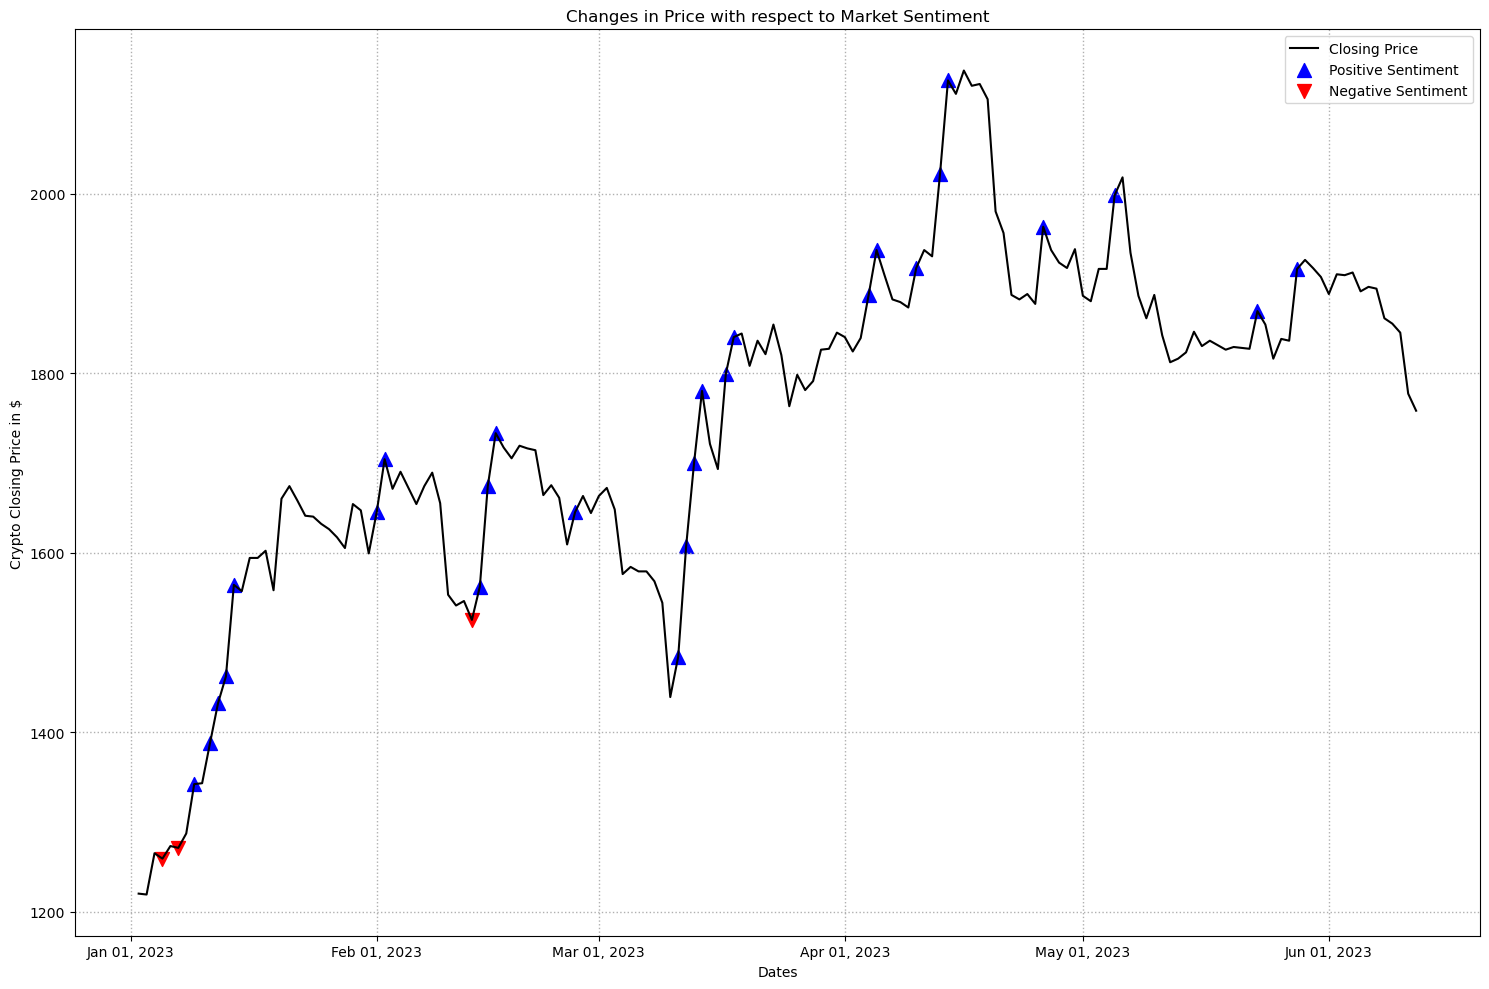

In [5]:
eth_tweets = f.crypto_sentiment("./TwitterData/eth_selected_with_sentiment_2023_01_02_2023_06_12.csv")

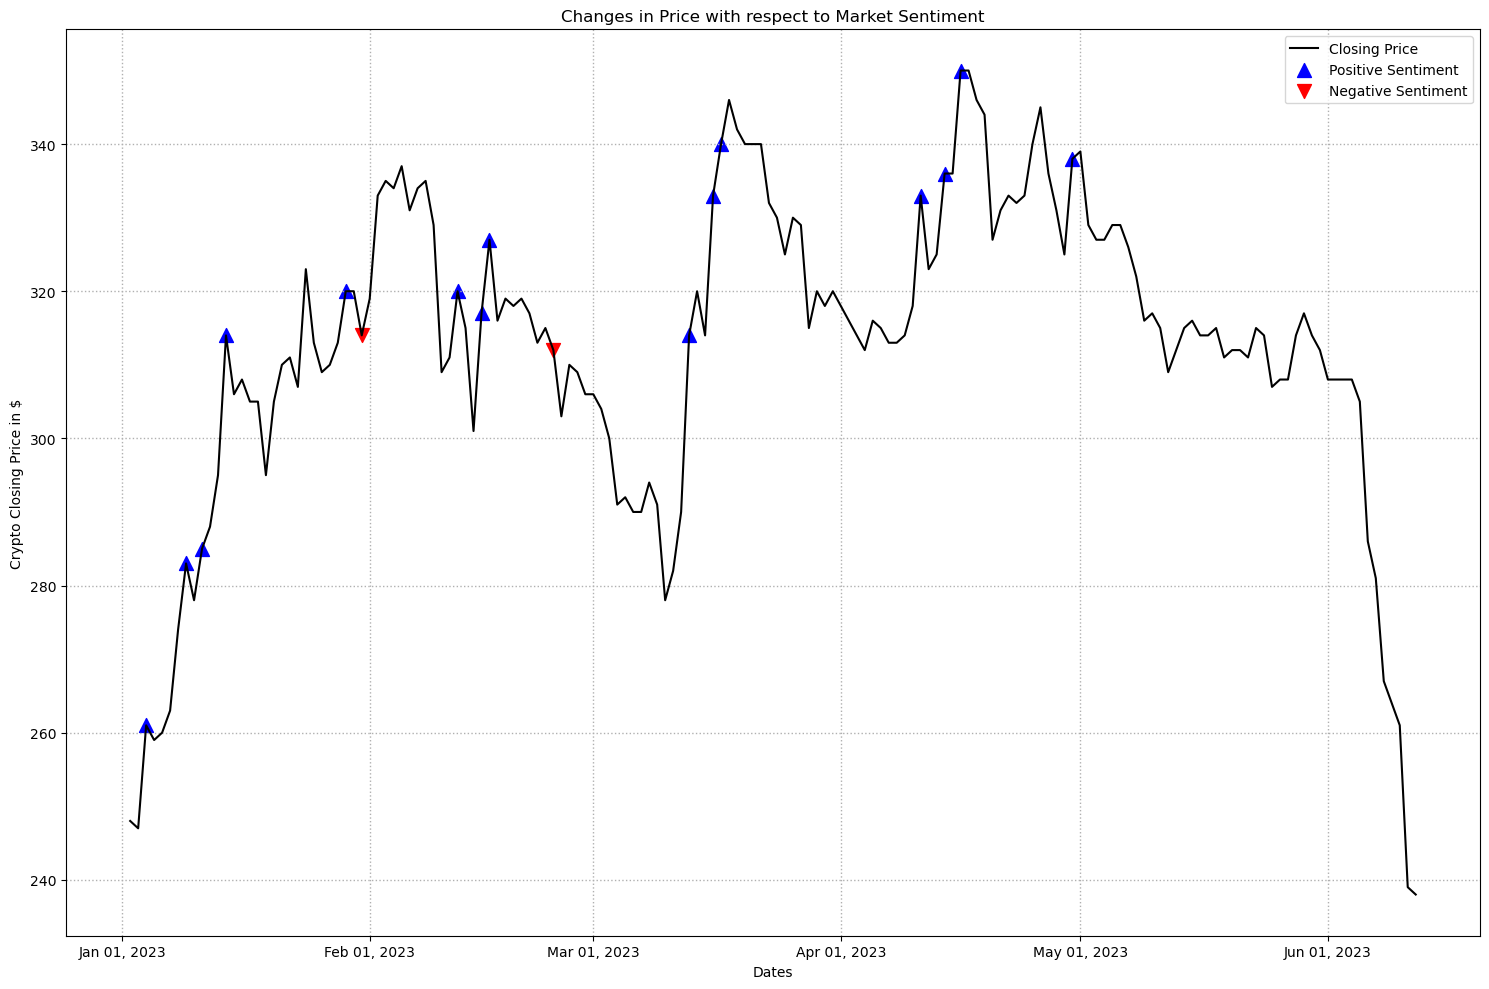

In [6]:
bnb_tweets = f.crypto_sentiment("./TwitterData/bnb_selected_with_sentiment_2023_01_02_2023_06_12.csv")

*  Dataset used in the analysis is taken from an ongoing research on the same topic.
*  Dataset contains filtered tweets from more than 50 Cryptocurrency Influencers, from Jan 2023 to June 2023.
*  Sentiment has been selected based on the ‘importance_coefficient’ , which was calculated using parameters of number of likes, *  retweets, comments, followers. 

*  While not a perfect correlation, there seem to be instances where positive sentiment aligns with price increases and negative sentiment coincides with price drops. This suggests that market sentiment, as captured by the indicators, can play a role in influencing short-term price movements.

*  More Data is needed to support the hypothesis that Social Media Sentiment plays a role in driving Cryptocurrency Prices
* Although, there have been some instances where the increase in prices of Bitcoin and Ethereum aligned with the overall positive sentiment on Twitter
* Cryptocurrencies are highly volatile, and the sentiments, not just from Twitter but from other social media platforms and news play an important role in determining the price of Cryptocurrencies.




## Unemployment

In [40]:
unemployment_usa = f.unemployment_data("./EconomicFactors/monthly_unemployment_data.csv", period_one = '2023-01-01', period_two = '2023-12-31')
unemployment_usa
unemployment_usa = unemployment_usa.rename(columns = {"TIME_PERIOD":"Date"})
unemployment_usa['Date'] = pd.to_datetime(unemployment_usa['Date'])

In [41]:
merged_data_btc = pd.merge(unemployment_usa, bitcoin, left_on='Date', right_on='Date', how='inner')

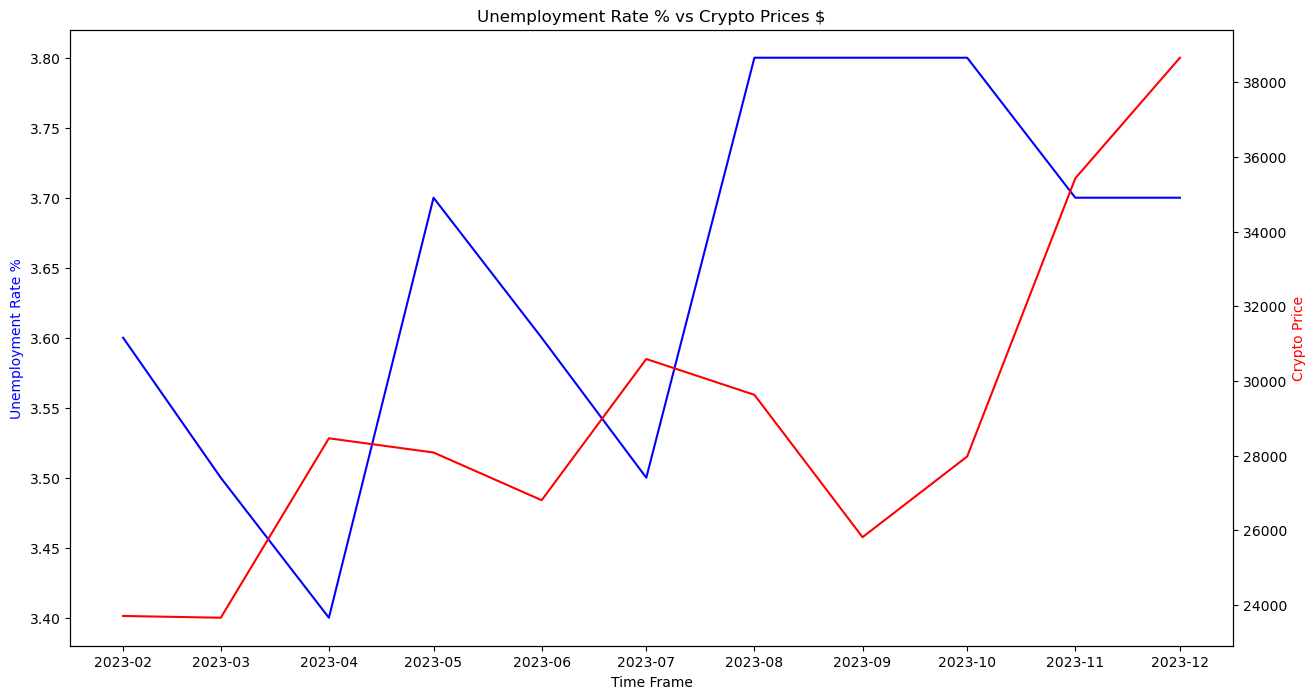

In [42]:
u_btc = f.plot_unemployment_trends(merged_data_btc)

In [44]:
def merge_unemployment_data(unemployment,crypto):
    
    unemployment_data = unemployment
    crypto_data = crypto
    
    merged_data_crypto = pd.merge(unemployment_data, crypto_data, left_on='Date', right_on='Date', how='inner')
    
    return merged_data_crypto  

In [45]:
ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')

In [48]:
eth_un = merge_unemployment_data(unemployment_usa,ethereum)

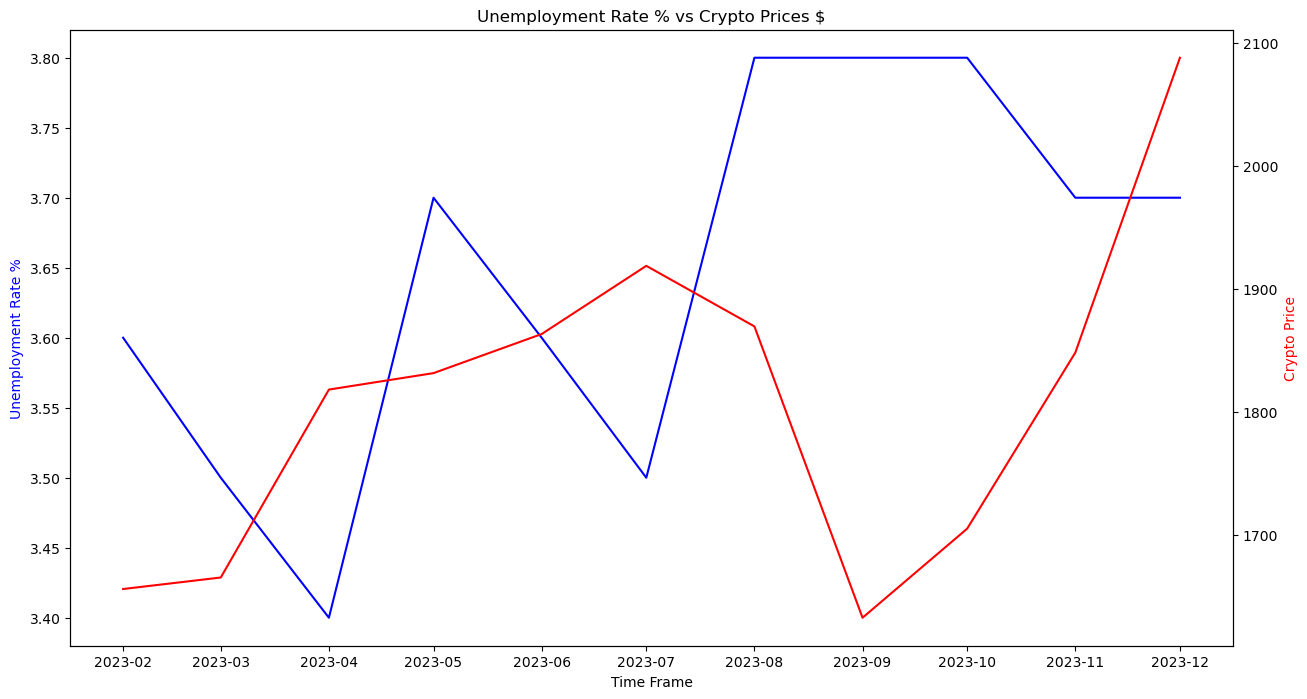

In [49]:
f.plot_unemployment_trends(eth_un)

In [50]:
unemployment_usa = f.unemployment_data("./EconomicFactors/monthly_unemployment_data.csv", period_one = '2022-01-01', period_two = '2022-12-31')
unemployment_usa
unemployment_usa = unemployment_usa.rename(columns = {"TIME_PERIOD":"Date"})
unemployment_usa['Date'] = pd.to_datetime(unemployment_usa['Date'])

In [56]:
ripple = f.crypto_dataset('./cryptodata/ripple_2016-01-01_2024-04-22.csv')

In [57]:
rip = merge_unemployment_data(unemployment_usa,ripple)

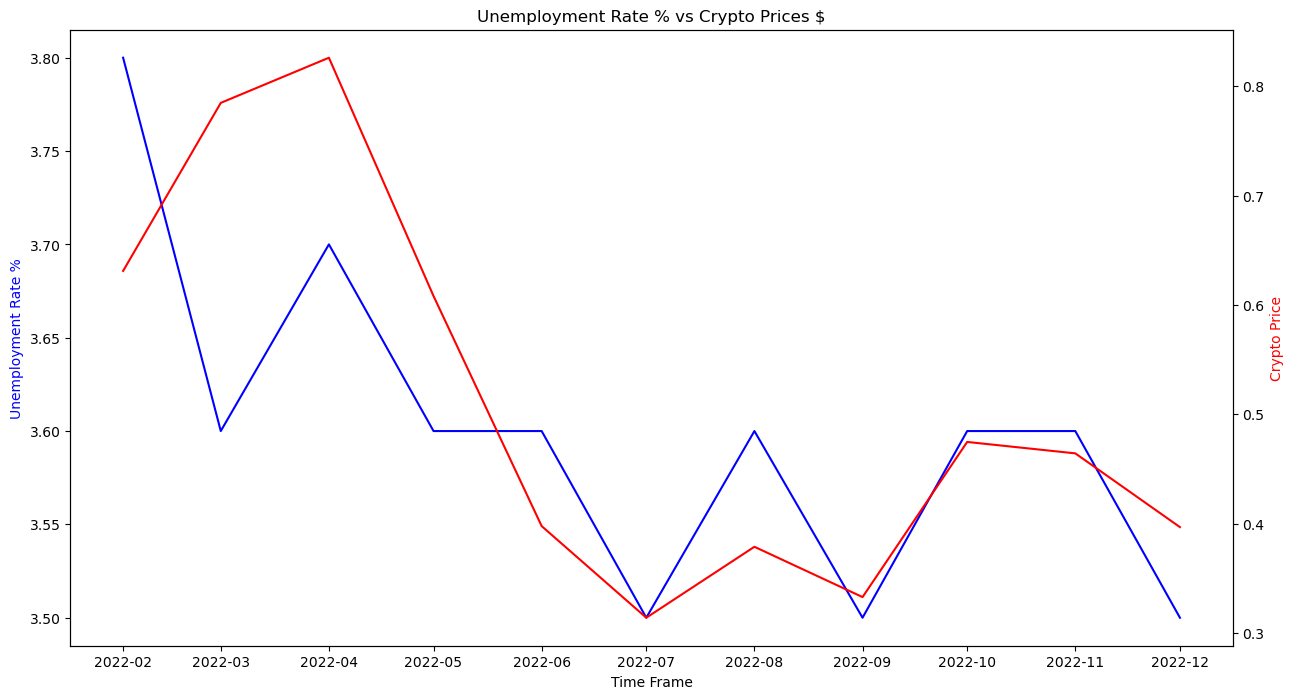

In [58]:
f.plot_unemployment_trends(rip)

*  Talking about the second hypothesis, one can hypothesize that low unemployment rates generally indicate a healthy economy with higher income among individuals, can lead to an increase in cryptocurrency investments
*  During COVID, unemployment rates skyrocketed around the world, which also had an impact on Cryptocurrency prices
*  In the US, government stimulus packages during the pandemic likely played a significant role in boosting asset prices, including cryptocurrencies.
*  Post pandemic, the unemployment rate in the US started to decline, and the crypto prices gradually increased.
*  Although, there's no direct relation, we can see some trends in 2022 and early 2024. But the relationship is not consistent.
*  Thus, there is not enough evidence to prove our hypothesis.

 


In [110]:
doge = f.crypto_dataset('./cryptodata/dogecoin_2016-01-01_2024-04-22.csv')

## Inflation Rates

In [66]:
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
4128,2013-01-01,13.3041,13.3041,13.3041,13.3041,0.000000e+00,0.000000e+00
4127,2013-01-02,13.2800,13.2800,13.2800,13.2800,0.000000e+00,0.000000e+00
4126,2013-01-03,13.3979,13.3979,13.3979,13.3979,0.000000e+00,0.000000e+00
4125,2013-01-04,13.5000,13.5000,13.5000,13.5000,0.000000e+00,0.000000e+00
4124,2013-01-05,13.4400,13.4400,13.4400,13.4400,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
4,2024-04-17,63719.7200,64409.6100,60035.0400,61309.9700,1.592861e+11,1.230614e+12
3,2024-04-18,61386.4400,64049.9100,60896.0000,63418.0000,1.622083e+11,1.228285e+12
2,2024-04-19,63286.0000,65384.6000,59734.4200,63965.9500,1.796266e+11,1.254719e+12
1,2024-04-20,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12


In [64]:
inflation_btc = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', bitcoin)

In [65]:
inflation_btc

,date,Inflation Rate (%),Annual Change,,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-12-31,1.4439,-0.91,NaN,2015-12-31,426.620000,432.921000,418.735000,430.538000,4.341306e+07,6.390443e+09
1,2016-12-31,1.6055,0.16,NaN,2016-12-31,961.238000,963.599000,947.236000,963.599000,1.335818e+08,1.534369e+10
2,2017-12-31,2.2543,0.65,NaN,2017-12-31,12596.018572,14298.865845,12395.289475,14033.567993,1.181868e+10,2.296027e+11
3,2018-12-31,2.4504,0.20,NaN,2018-12-31,3863.966826,3865.309440,3727.103167,3746.123953,3.648742e+09,6.640670e+10
4,2019-12-31,2.2061,-0.24,NaN,2019-12-31,7245.200685,7300.392728,7155.958221,7202.624251,1.923169e+10,1.306356e+11
5,2020-12-31,1.9369,-0.27,NaN,2020-12-31,28863.191666,29272.578049,27986.652153,28977.961818,7.927135e+10,5.363150e+11
6,2021-12-31,3.4669,1.53,NaN,2021-12-31,47139.359000,48505.999700,45712.566592,46304.949594,7.810027e+10,8.945653e+11
7,2022-12-31,7.9676,4.50,NaN,2022-12-31,16608.070868,16632.899700,16495.873732,16538.347900,3.406534e+10,3.183907e+11


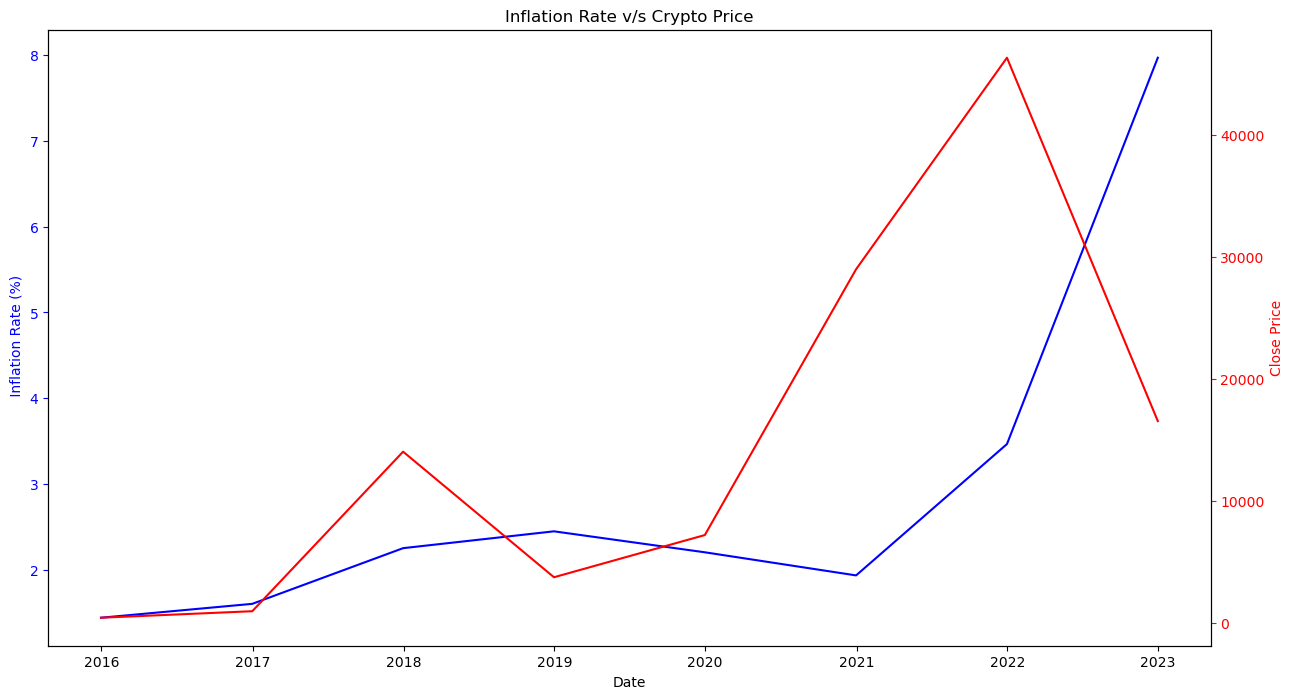

In [67]:
f.plot_inflation_trends(inflation_btc)

In [68]:
inflation_eth = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', ethereum)

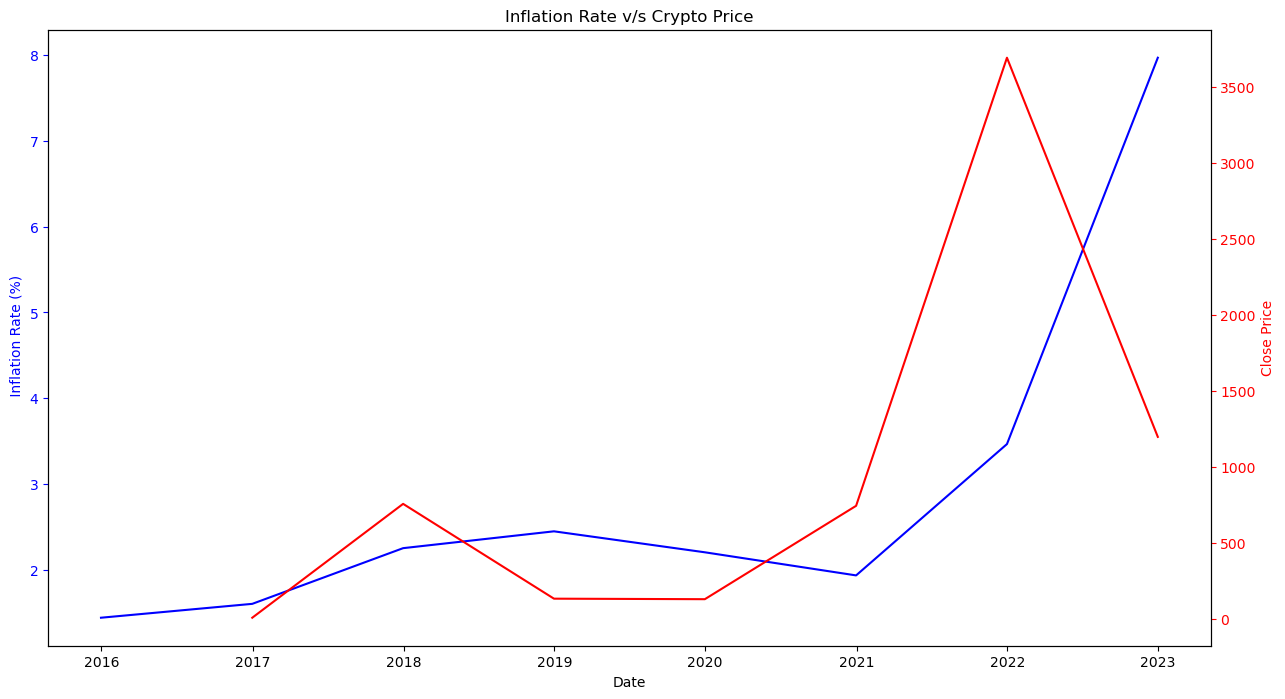

In [69]:
f.plot_inflation_trends(inflation_eth)

In [71]:
usdt = f.crypto_dataset('./cryptodata/tether_2015-01-01_2024-04-22.csv')

In [72]:
inflation_usdt = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', usdt)

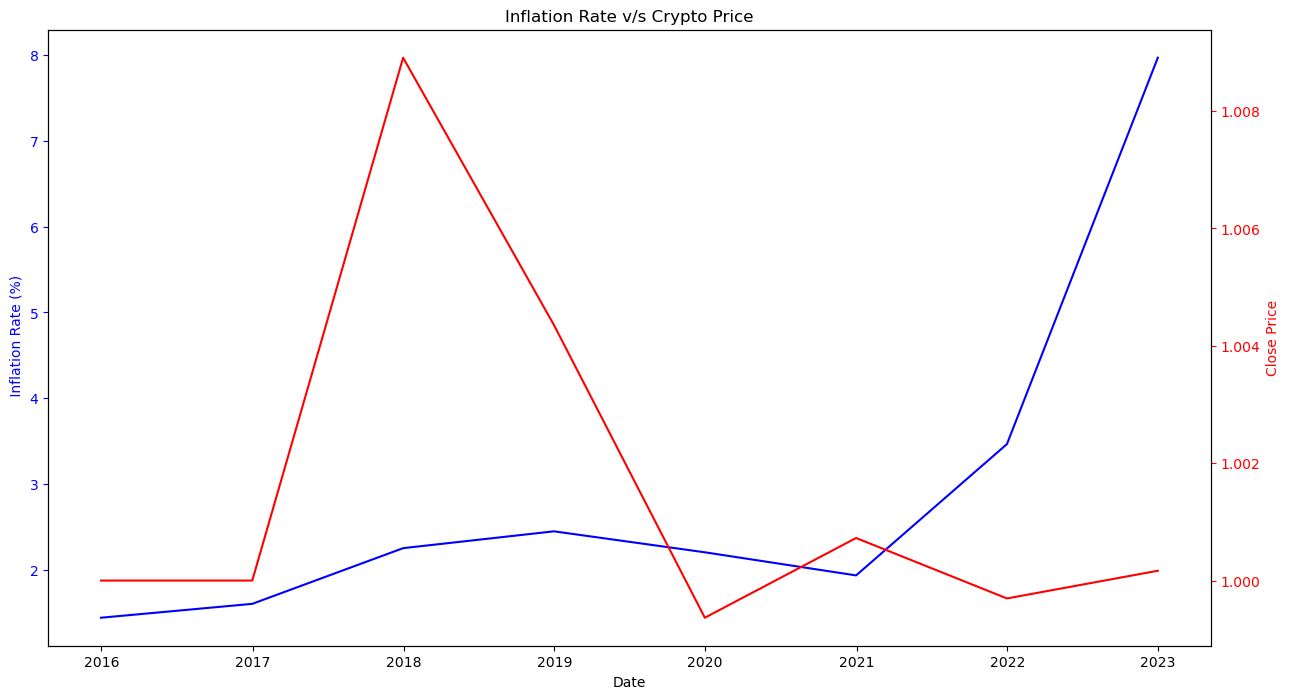

In [73]:
f.plot_inflation_trends(inflation_usdt)

In [74]:
inflation_rip = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', ripple)

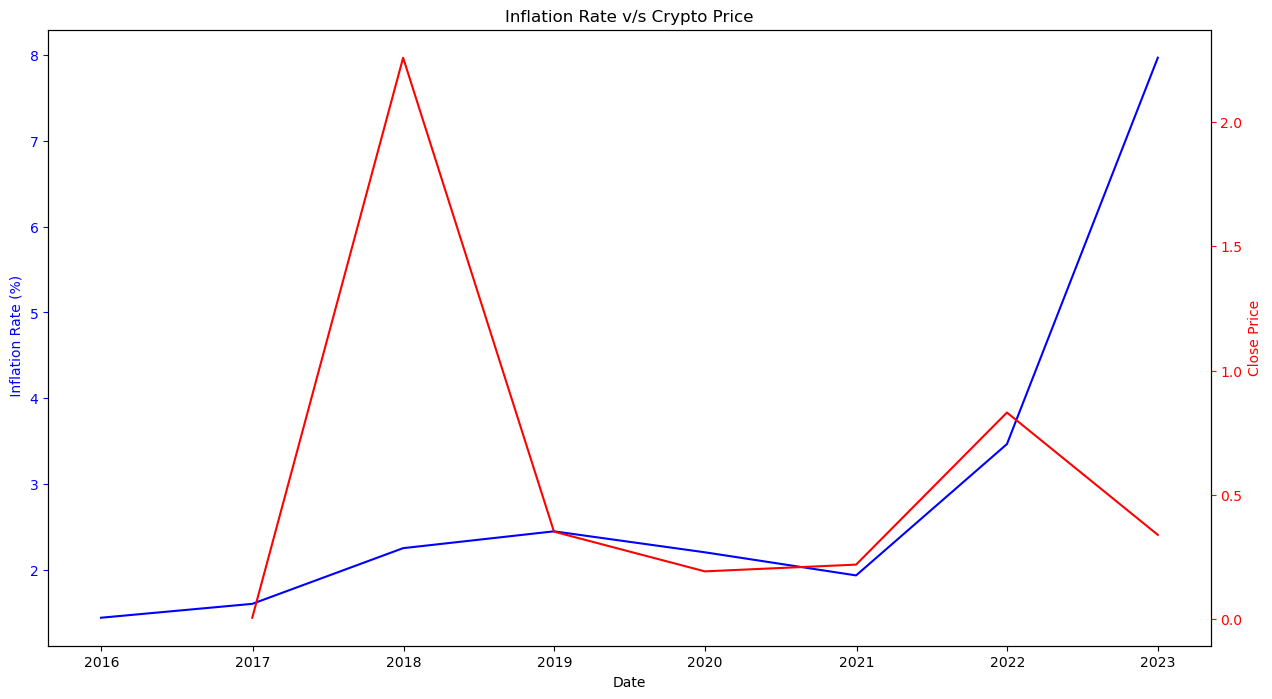

In [75]:
f.plot_inflation_trends(inflation_rip)

In [77]:
binance = f.crypto_dataset('./cryptodata/binance-coin_2017-08-16_2024-04-22.csv')

In [78]:
inflation_bnb = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', binance)

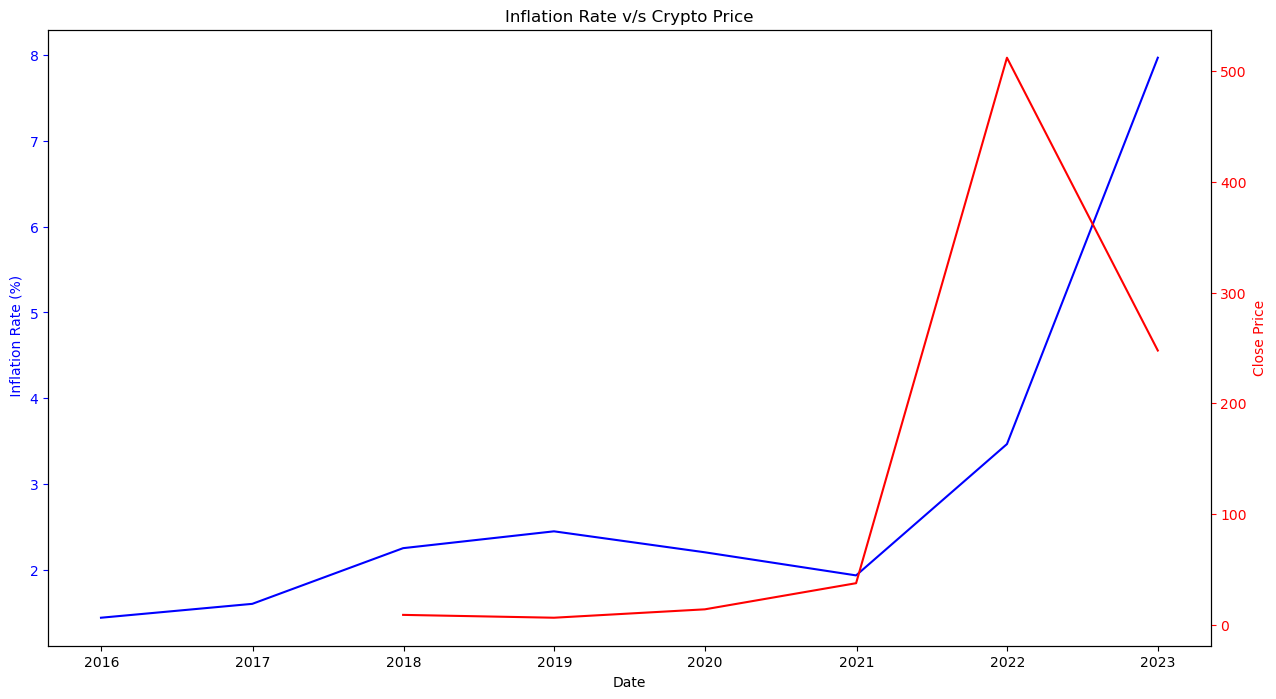

In [79]:
f.plot_inflation_trends(inflation_bnb)

*  We can some trends after 2020, especially in the year 2022, the inflation rate is low and the bitcoin price is high, but then as inflation increases, the price decreases. 
*  Both the inflation rate and crypto price display volatility during this period.
*  Trends are quite evident after 2022, with most of the cryptocurrencies dipping low due to the rise in inflation rate around the world.
*   Inflation is influenced by various economic factors such as supply chain disruptions, energy prices, monetary policy, and geopolitical events.  These factors can also indirectly impact cryptocurrency prices.
*  The graph shows a relationship between inflation and crypto prices, but in combination with other economic factors.
*  Not quite evident in earlier years, seems to have a trend in recent years.


## Federal Interest Rates

In [89]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2018', period_two = '2018-12-31')

In [90]:
fed_btc

,DATE,FEDFUNDS,Date,Open,High,Low,Close,Volume,Market Cap
24,2018-01-01,1.41,2018-01-01,14046.002764,14521.965544,12980.811131,13577.188555,9.527935e+09,2.292229e+11
25,2018-02-01,1.42,2018-02-01,10269.843887,10332.946065,8700.332595,9171.249369,4.557095e+09,1.620348e+11
26,2018-03-01,1.51,2018-03-01,10423.581476,10974.716731,10375.265796,10929.765497,3.441035e+09,1.796653e+11
27,2018-04-01,1.69,2018-04-01,6959.890620,7054.477480,6506.022091,6830.630577,3.598865e+09,1.162929e+11
28,2018-05-01,1.70,2018-05-01,9253.083883,9253.083883,8881.779114,9096.810022,6.156448e+09,1.532087e+11
29,2018-06-01,1.82,2018-06-01,7503.960275,7590.623838,7411.831128,7525.473797,3.534811e+09,1.277794e+11
30,2018-07-01,1.91,2018-07-01,6385.423752,6409.365459,6310.846816,6364.401842,3.508360e+09,1.090069e+11
31,2018-08-01,1.91,2018-08-01,7744.631395,7747.417375,7492.216628,7596.721803,4.823441e+09,1.302081e+11
32,2018-09-01,1.95,2018-09-01,7011.745045,7238.263496,7011.745045,7193.248733,3.736417e+09,1.224339e+11
33,2018-10-01,2.19,2018-10-01,6624.023395,6653.039249,6531.896590,6596.018098,3.103182e+09,1.142173e+11


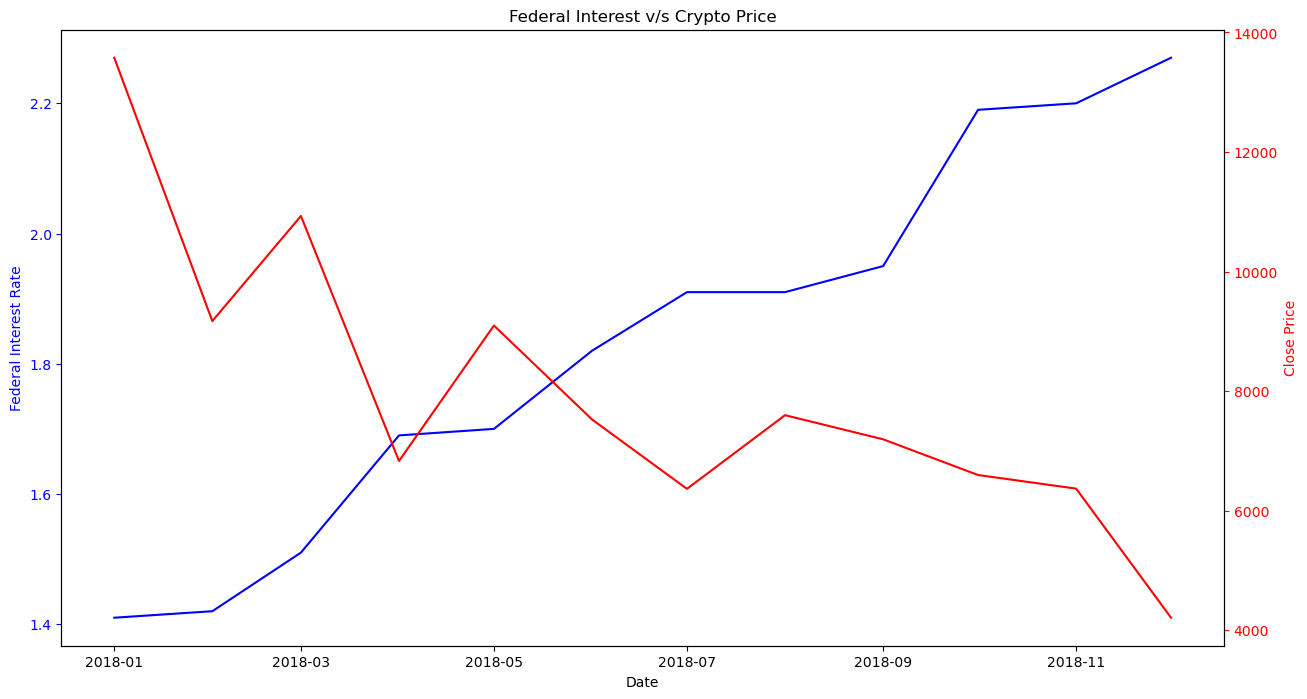

In [91]:
f.plot_federal_interest_trends(fed_btc)

In [92]:
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

Correlation Coefficient: -0.84377208083262


In [93]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2019', period_two = '2019-12-31')

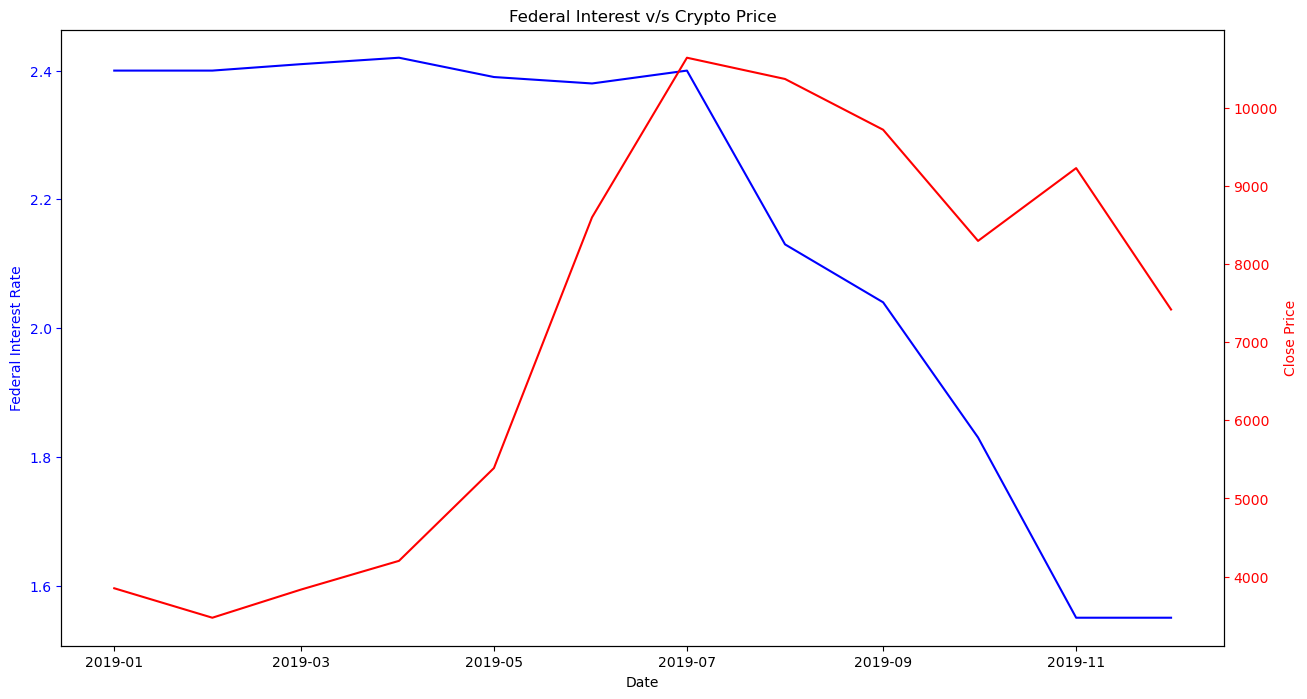

In [94]:
f.plot_federal_interest_trends(fed_btc)

In [95]:
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

Correlation Coefficient: -0.4576541565526137


In [100]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2020', period_two = '2020-12-31')

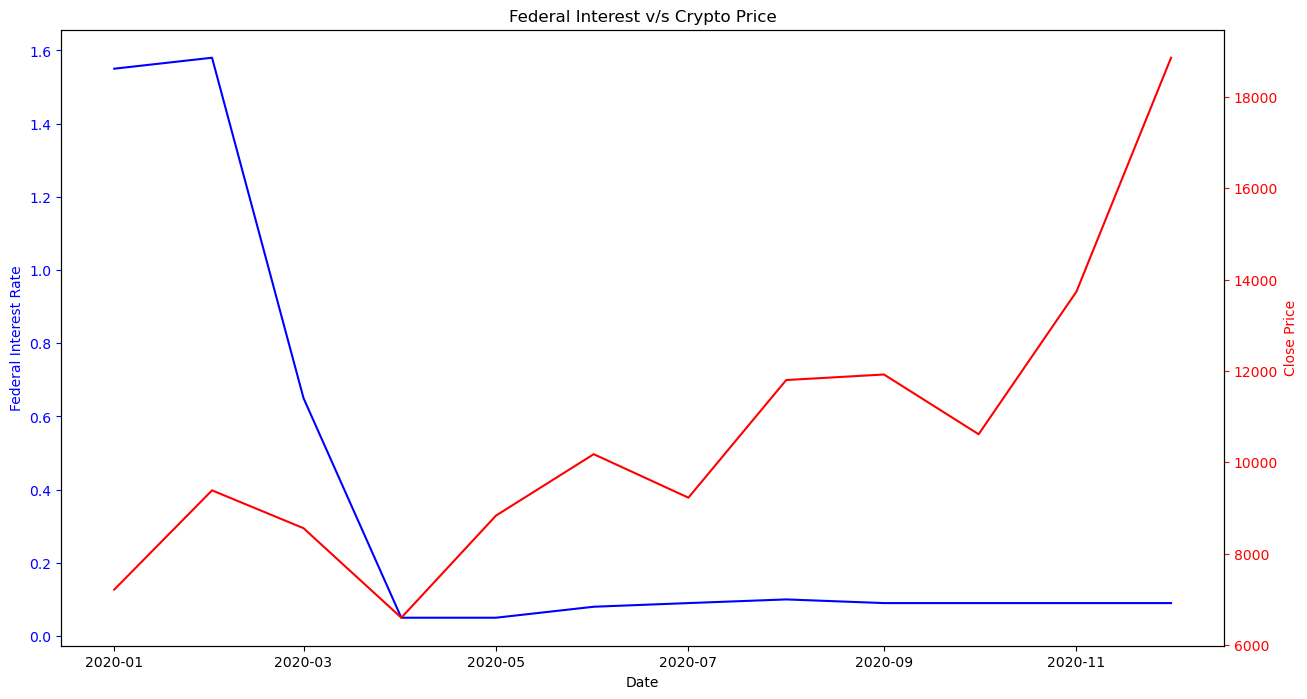

Correlation Coefficient: -0.36056716780464276


In [101]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2020', period_two = '2020-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

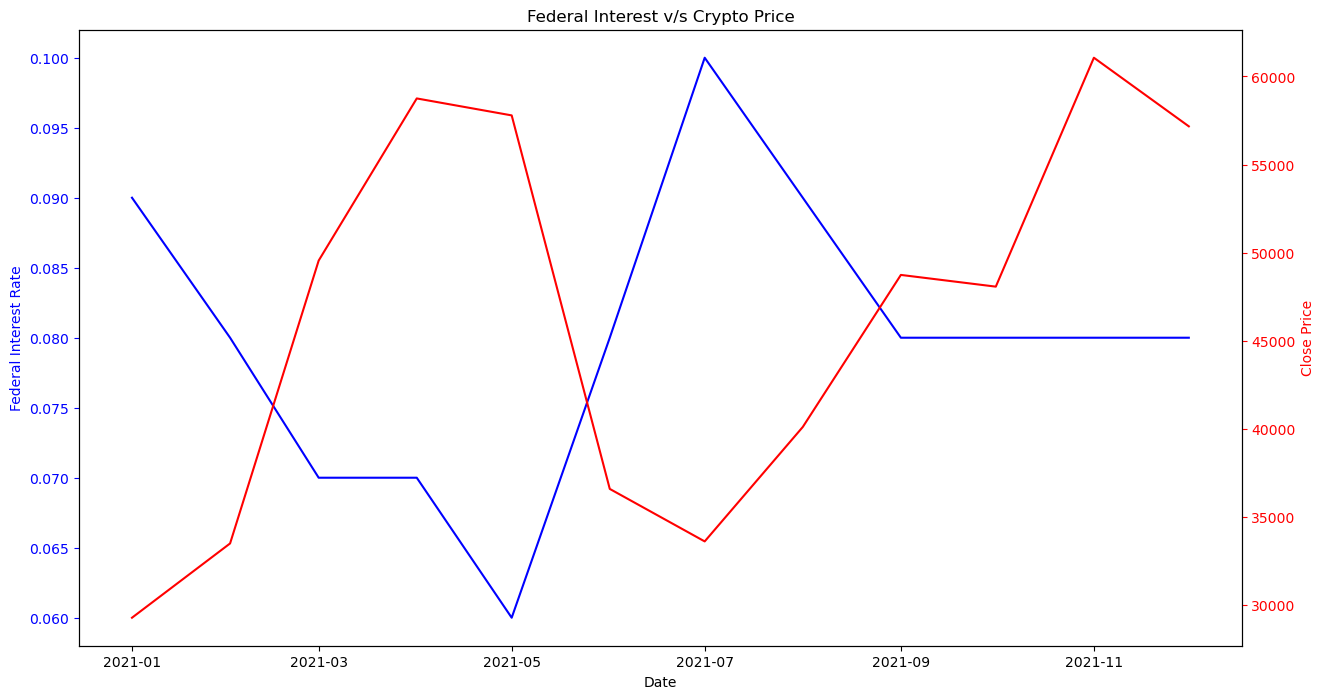

Correlation Coefficient: -0.6757640142201339


In [102]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2021', period_two = '2021-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

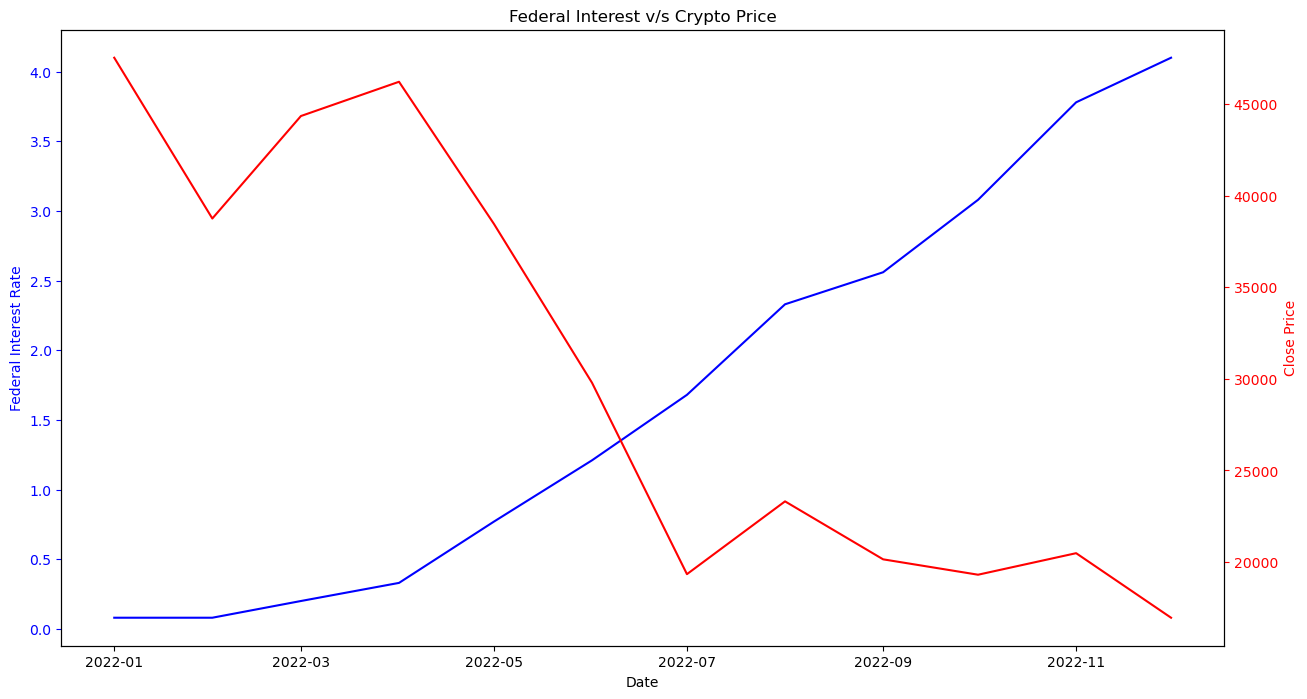

Correlation Coefficient: -0.9000228172941939


In [103]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

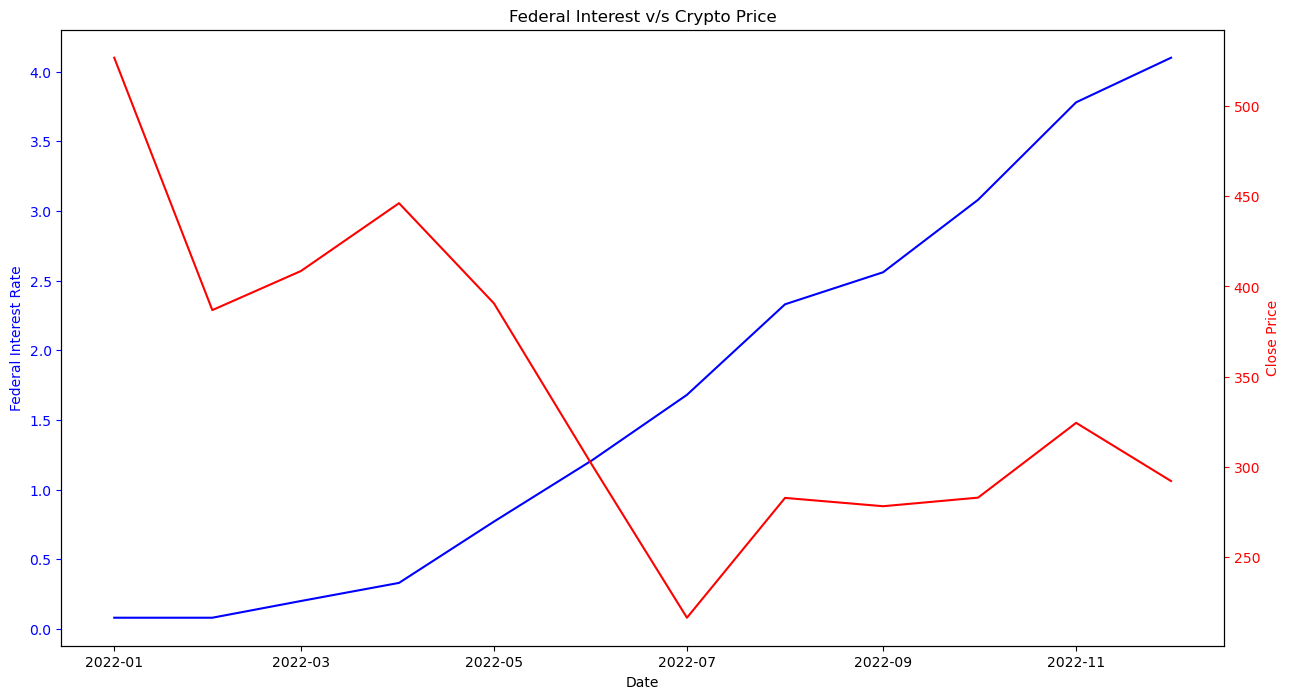

Correlation Coefficient: -0.6823403235874682


In [105]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", binance, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

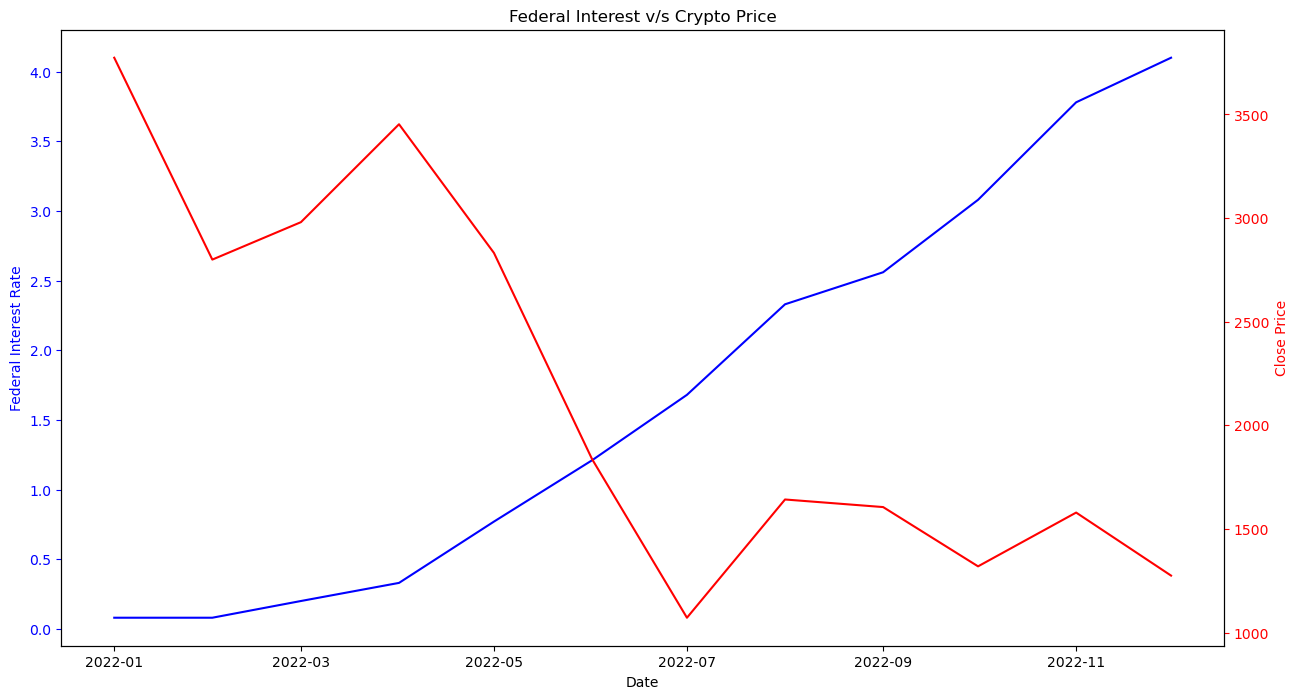

Correlation Coefficient: -0.8274847224106427


In [107]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", ethereum, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

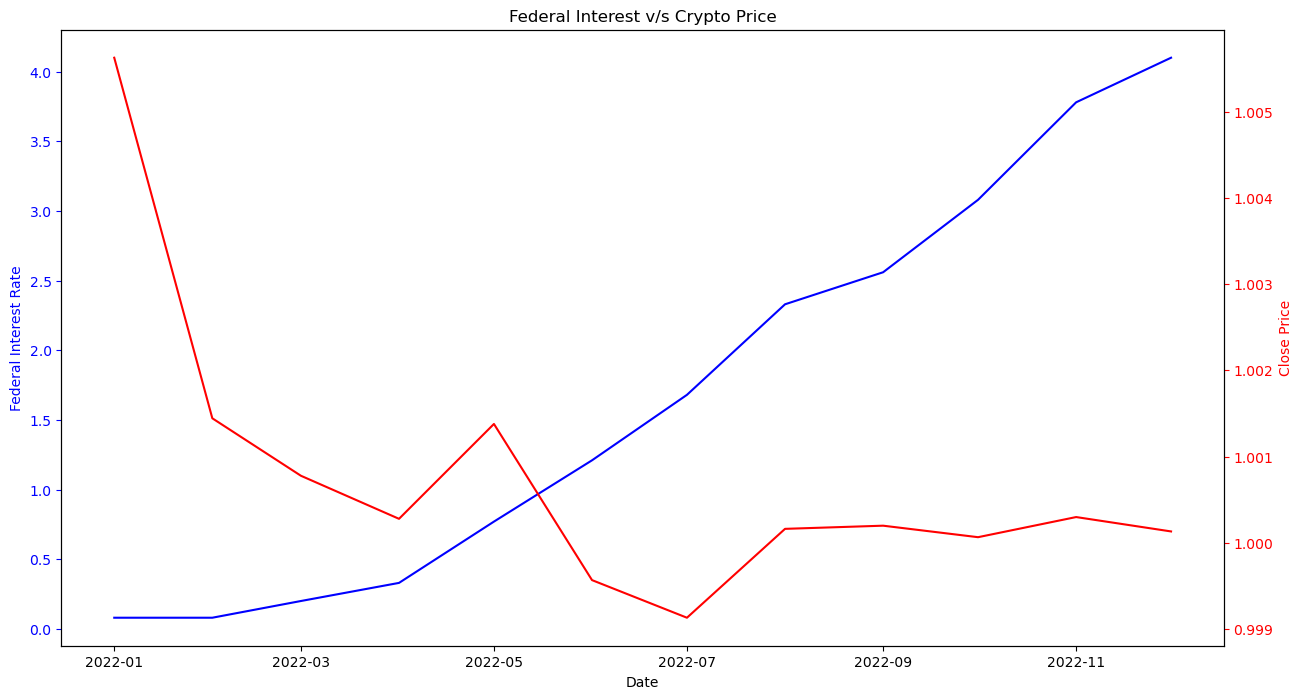

Correlation Coefficient: -0.46891451879457274


In [109]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", usdt, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

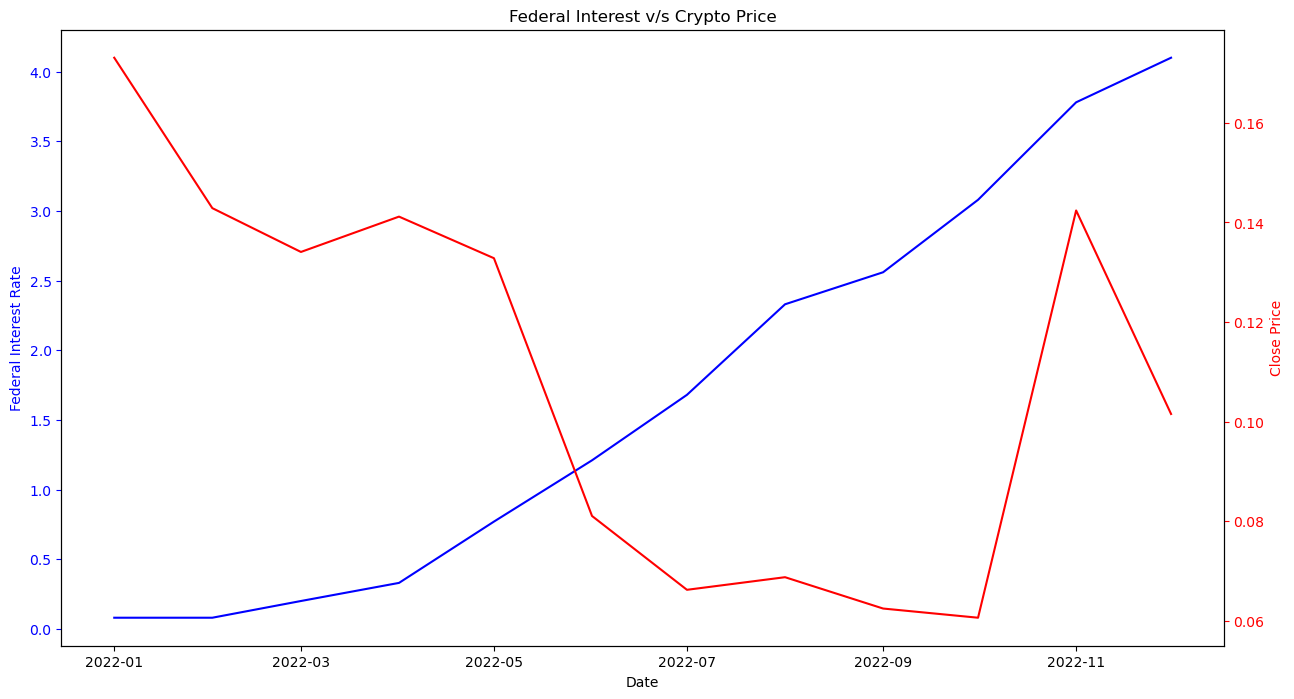

Correlation Coefficient: -0.5127788733573155


In [111]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", doge, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

## USD

In [126]:
usd_btc = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", bitcoin, period_one="2019", period_two="2019-12-31")

In [133]:
usd_btc

,Date,Price,Open_x,High_x,Low_x,Vol.,Change %,Open_y,High_y,Low_y,Close,Volume,Market Cap
783,2019-01-01,96.17,96.15,96.32,95.65,NaN,0.00%,3747.289082,3857.661350,3720.528270,3851.181614,3.433814e+09,6.561697e+10
784,2019-01-02,96.82,96.14,96.96,95.82,NaN,0.68%,3852.524626,3944.482761,3825.302832,3938.625961,3.910034e+09,6.752997e+10
785,2019-01-03,96.31,96.72,96.75,96.21,NaN,-0.53%,3935.381479,3935.381479,3828.512308,3843.996640,4.077089e+09,6.774767e+10
786,2019-01-04,96.18,96.28,96.61,96.05,NaN,-0.13%,3847.083953,3888.225089,3795.299372,3877.816632,3.521628e+09,6.709019e+10
787,2019-01-07,95.67,96.16,96.16,95.64,NaN,-0.53%,4082.095636,4103.696834,4027.393341,4036.958448,4.366201e+09,7.082522e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,2019-12-25,97.65,97.67,97.73,97.35,NaN,0.00%,7259.115864,7263.235588,7146.059773,7205.380688,1.854142e+10,1.306067e+11
1040,2019-12-26,97.53,97.62,97.71,97.49,NaN,-0.12%,7206.513103,7407.990908,7170.482251,7211.341194,1.726194e+10,1.308025e+11
1041,2019-12-27,96.92,97.54,97.55,96.92,NaN,-0.63%,7209.301104,7260.341054,7111.398497,7246.422425,2.098750e+10,1.303918e+11
1042,2019-12-30,96.74,97.02,97.02,96.61,NaN,-0.19%,7388.393119,7397.633413,7234.181931,7245.988923,2.020573e+10,1.323193e+11


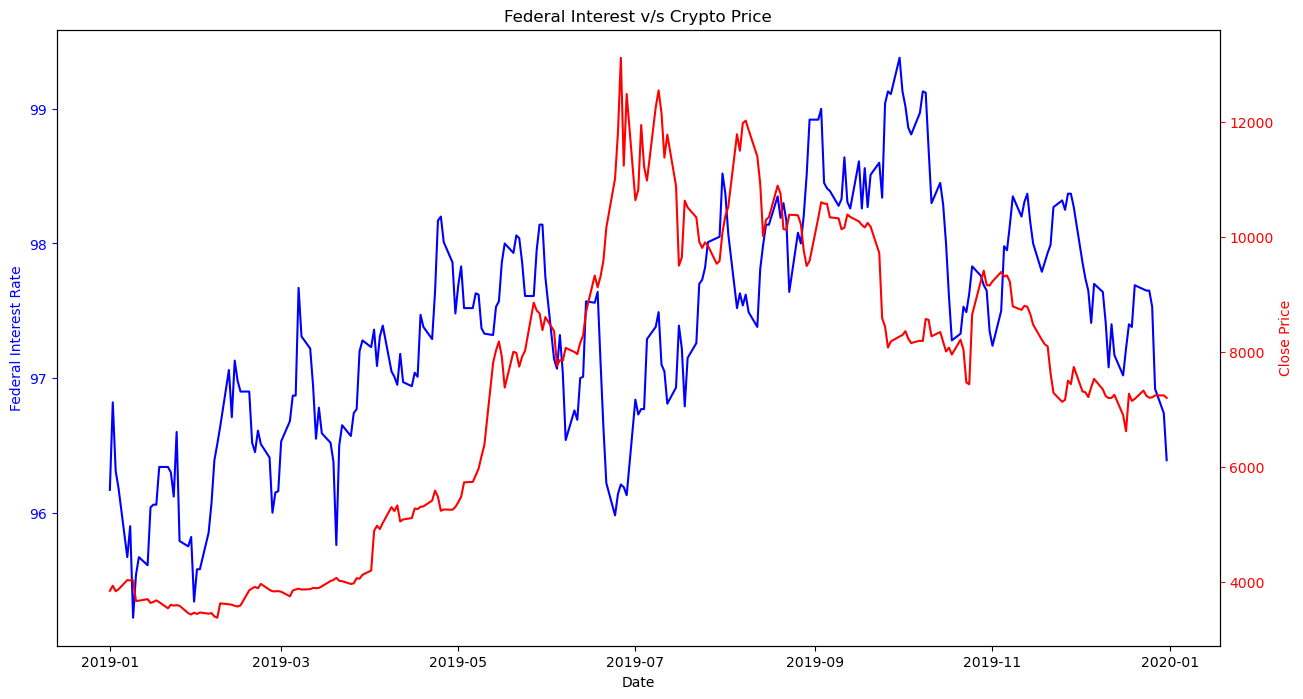

In [134]:
f.plot_usd_trends(usd_btc)

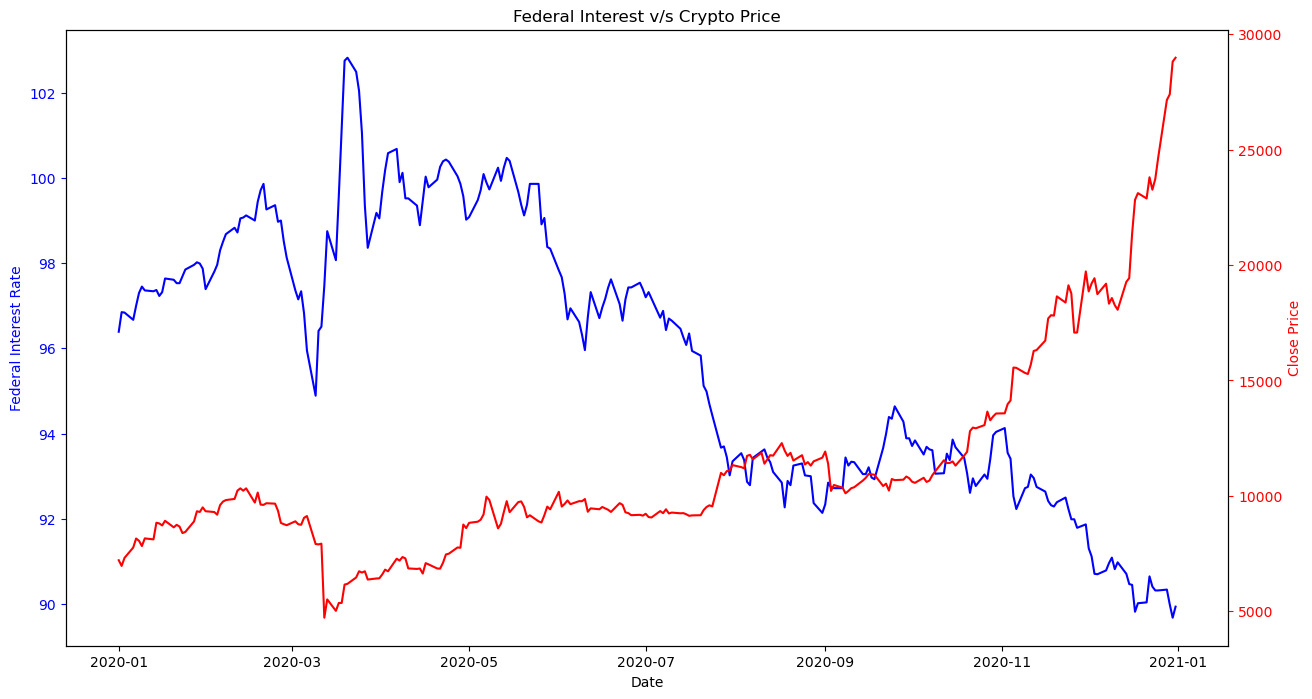

In [136]:
usd_btc = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", bitcoin, period_one="2020", period_two="2020-12-31")
f.plot_usd_trends(usd_btc)

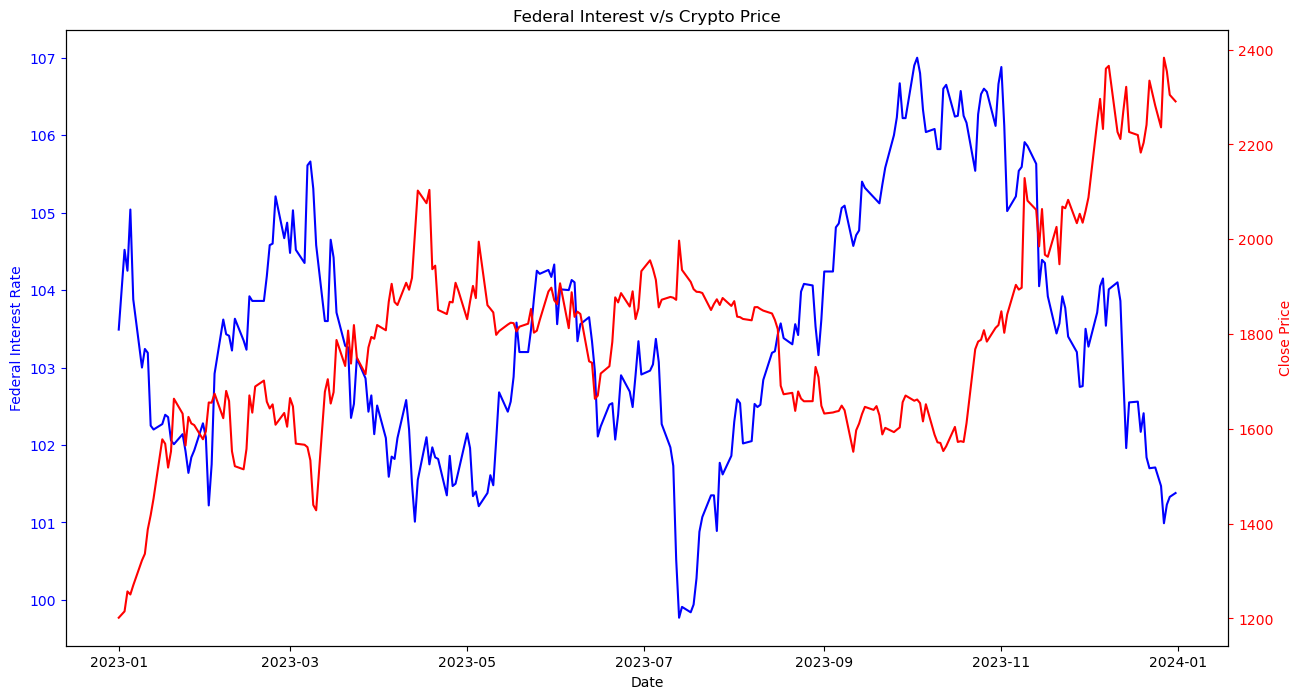

In [139]:
ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
usd_eth = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", ethereum, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(usd_eth)


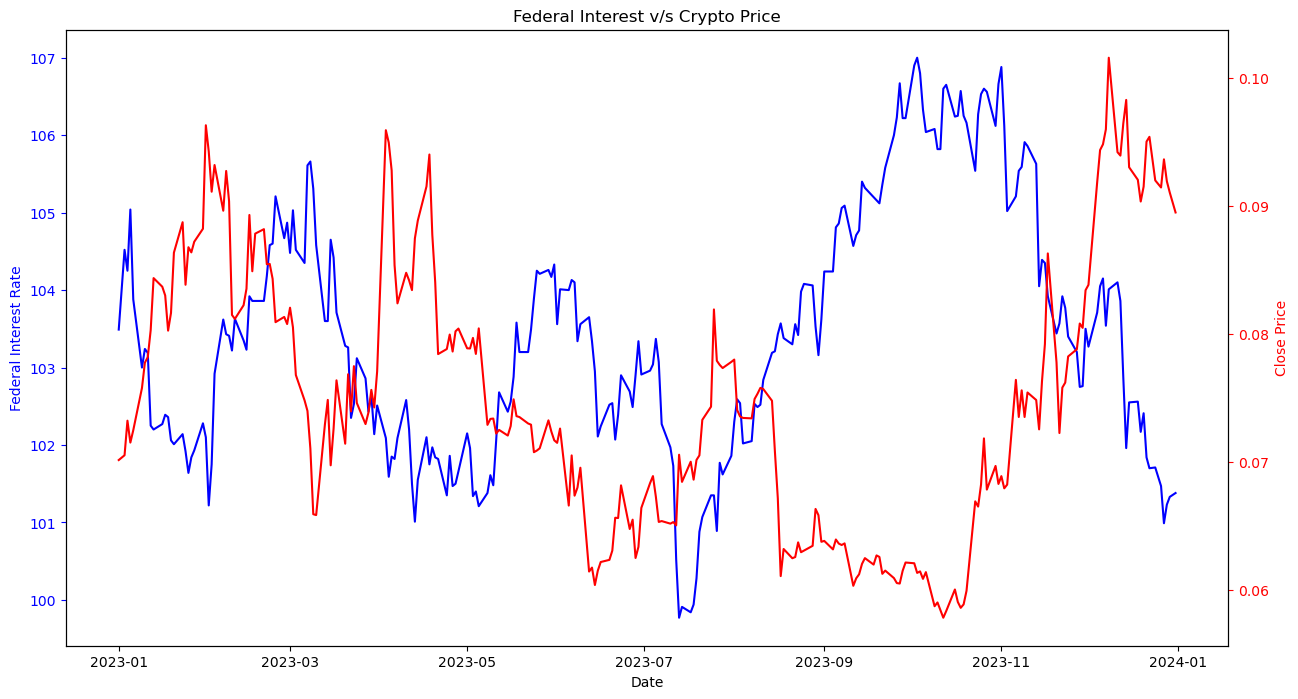

In [140]:
#ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
usd_doge = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", doge, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(usd_doge)


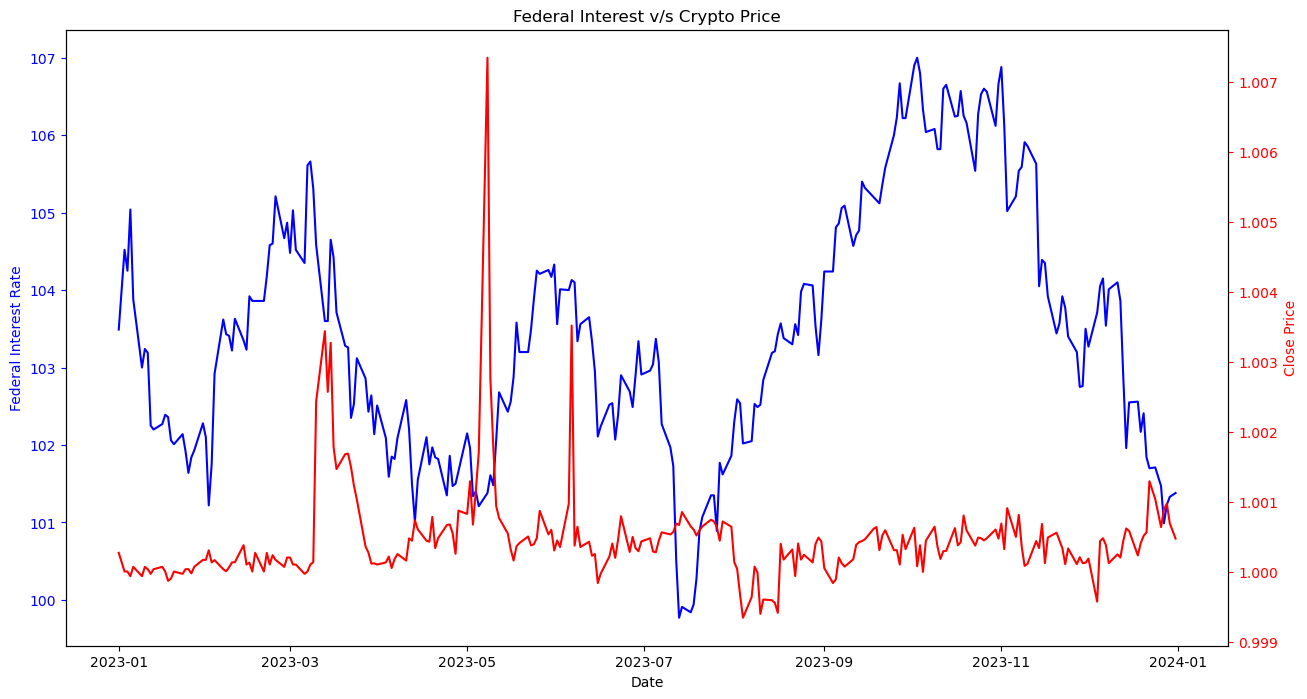

In [141]:
#ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
usd_usdt = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", usdt, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(usd_usdt)


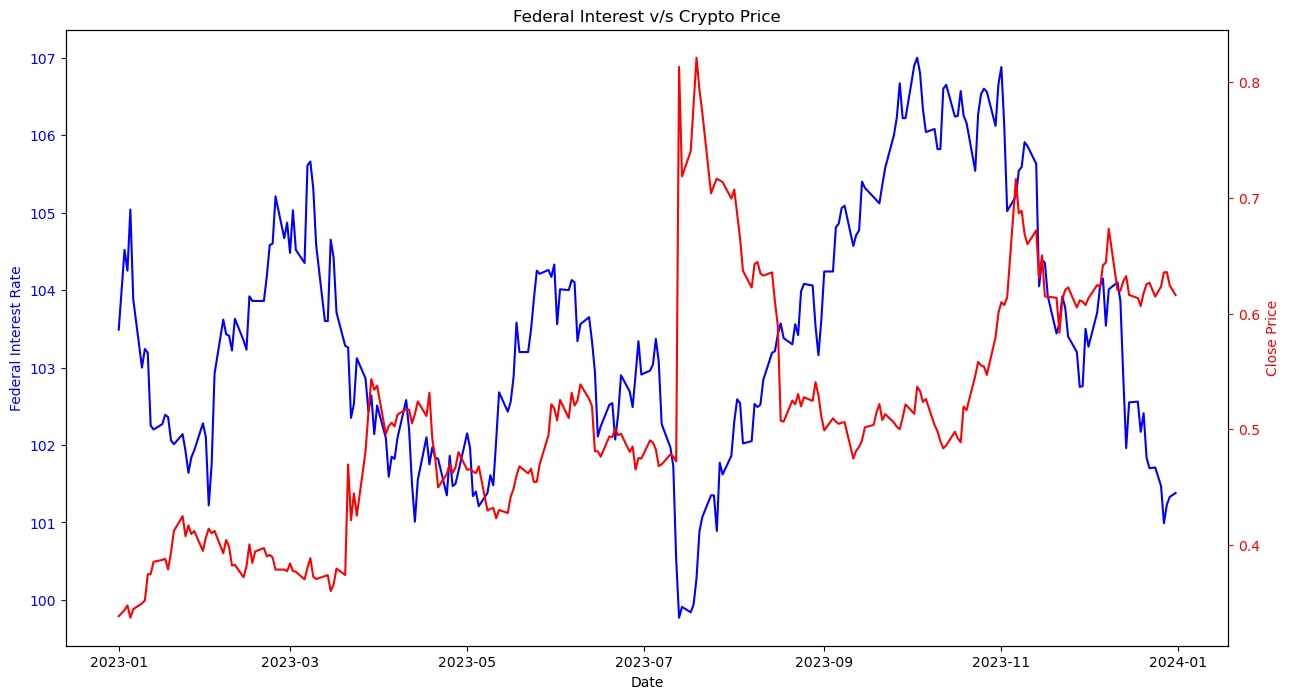

In [142]:

rip_usd = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", ripple, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(rip_usd)
